In [68]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
import joblib as jb

In [28]:
df = pd.read_csv('sample_data/social_media.csv')

In [29]:
df = df[df['platform'] == 'Instagram']
df.drop(columns=['platform'] , inplace=True)

In [34]:
df['ER'] = ((df['comments_count'] + df['likes'] + df['shares']+ df['views'])/ df['follower_count']) * 100
#df.drop(columns=['comments_count' , 'likes' , 'shares'] , inplace=True)

In [43]:
df.drop(df[df['ER'] > 100].index , inplace=True)


In [46]:
mean = df['ER'].mean()
std = df['ER'].std()
high_limit = mean + 3 * std
low_limit = mean - 3 * std
high_limit , low_limit

df = df[df['ER'] <= high_limit]

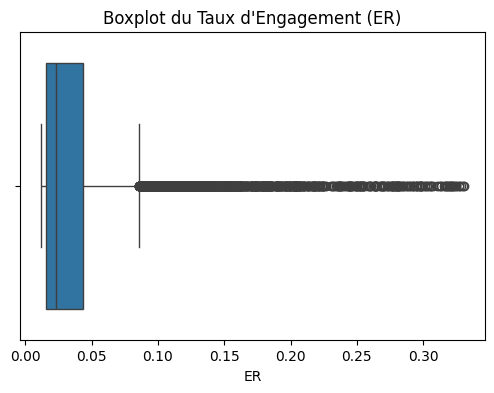

In [48]:
df['ER'].describe()
df['ER'].describe()
plt.figure(figsize=(6,4))
sns.boxplot(x=df['ER']/100)
plt.title('Boxplot du Taux d\'Engagement (ER)')
plt.show()

In [50]:
df['day'] = pd.to_datetime(df['post_date']).dt.day_name()
df['hour'] = pd.to_datetime(df['post_date']).dt.hour

/tmp/ipython-input-837538443.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['day'] = pd.to_datetime(df['post_date']).dt.day_name()
/tmp/ipython-input-837538443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = pd.to_datetime(df['post_date']).dt.day_name()
/tmp/ipython-input-837538443.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['post_date']).dt.hour
/tmp/ipython-input-837538443.py:2: SettingWithCopyWarning: 
A va

In [55]:
def calculate_description_score(description):
    if pd.isna(description):
        return 0.0
    blob = TextBlob(str(description))
    return blob.sentiment.polarity

In [56]:
def count_tags(h_str):
    if pd.isna(h_str) or h_str == "": return 0
    return len(str(h_str).split(','))

In [65]:
def count_description_words(description):
    if pd.isna(description):
        return 0
    return len(str(description).split())

In [66]:
df['description_score'] = df['content_description'].apply(calculate_description_score)
df['hashtag_count'] = df['hashtags'].apply(count_tags)
df['desciption_word_count'] = df['content_description'].apply(count_description_words)

/tmp/ipython-input-613623157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description_score'] = df['content_description'].apply(calculate_description_score)
/tmp/ipython-input-613623157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hashtag_count'] = df['hashtags'].apply(count_tags)
/tmp/ipython-input-613623157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [67]:
df.columns

Index(['content_type', 'post_date', 'content_length', 'content_description',
       'hashtags', 'views', 'likes', 'shares', 'comments_count',
       'follower_count', 'ER', 'day', 'hour', 'description_score',
       'hashtag_count', 'desciption_word_count'],
      dtype='object')

In [69]:
le_type = LabelEncoder()
df['content_type'] = le_type.fit_transform(df['content_type'])
le_day = LabelEncoder()
df['day'] = le_day.fit_transform(df['day'])

/tmp/ipython-input-1488422207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content_type'] = le_type.fit_transform(df['content_type'])
/tmp/ipython-input-1488422207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = le_day.fit_transform(df['day'])


In [71]:
jb.dump(le_type , 'sample_data/joblib/le_type.pkl')
jb.dump(le_day , 'sample_data/joblib/le_day.pkl')

['sample_data/joblib/le_day.pkl']

In [72]:
df.columns

Index(['content_type', 'post_date', 'content_length', 'content_description',
       'hashtags', 'views', 'likes', 'shares', 'comments_count',
       'follower_count', 'ER', 'day', 'hour', 'description_score',
       'hashtag_count', 'desciption_word_count'],
      dtype='object')

In [73]:
df.drop(columns=['post_date' , 'content_description' , 'likes' ,'views','shares' ,'hashtags' ] , inplace=True)

/tmp/ipython-input-2634817984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['post_date' , 'content_description' , 'likes' ,'views','shares' ,'hashtags' ] , inplace=True)
